In [ ]:
!git clone https://github.com/cwmok/Fast-Symmetric-Diffeomorphic-Image-Registration-with-Convolutional-Neural-Networks

Cloning into 'Fast-Symmetric-Diffeomorphic-Image-Registration-with-Convolutional-Neural-Networks'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 140 (delta 76), reused 66 (delta 18), pack-reused 0
Receiving objects: 100% (140/140), 26.59 MiB | 10.74 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchvision 0.16.0+cu118 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.


In [ ]:
!pip install numpy


In [ ]:
!pip install nibabel

In [ ]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf

In [ ]:
imagenA = nib.load('/content/drive/MyDrive/pruebasTFG/002_S_0295_ADNI1_MPRAGE_N3-NoSkull.nii').get_fdata()
imagenA = imagenA[0:176,0:208,0:176]
imagenA.shape
print(type(imagenA))

imagenB = nib.load('/content/drive/MyDrive/pruebasTFG/002_S_0619_ADNI1_MPRAGE_N3-NoSkull.nii').get_fdata()
imagenB = imagenB[0:176,0:208,0:176]
imagenB.shape
print(type(imagenB))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
pip install voxelmorph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystrum: filename=pystrum-0.4-py3-none-any.whl size=19535 sha256=c4cbc1166a32ddd130efe54a570739296814170978f66d0eb69b93165248850c
  Stored in directory: /root/.cache/pip/wheels/aa/08/d0/914025beb5a12a855b8aafd22eeedc547198684a3f4409f66c
Successfully built pystrum


In [ ]:
import voxelmorph as vxm
import neurite as ne

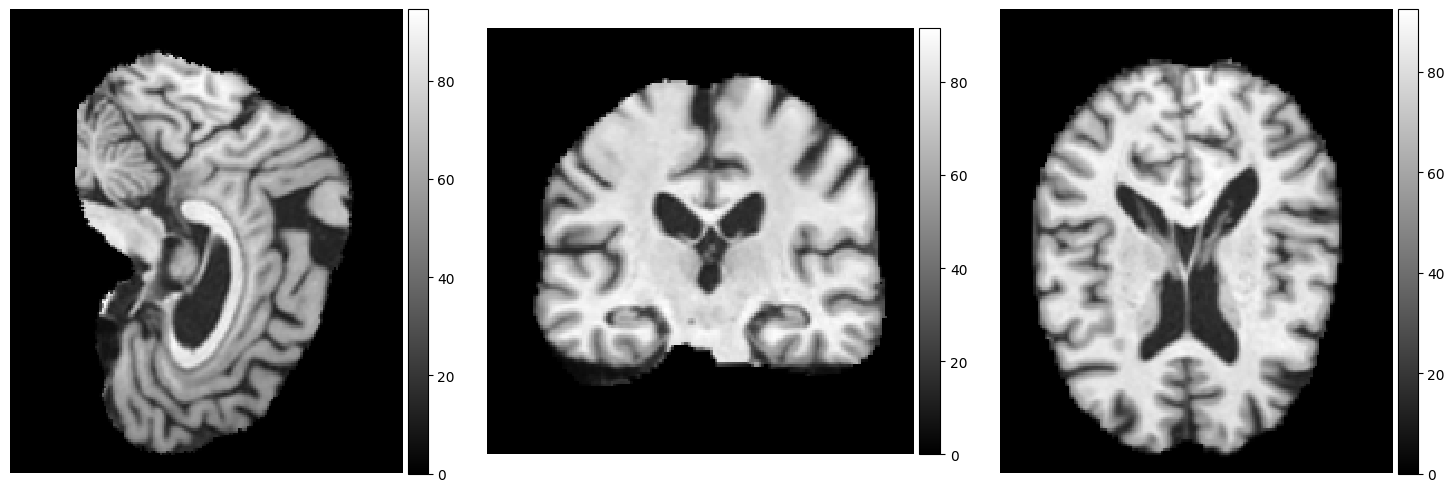

In [ ]:


vol_shape = (176, 208, 176)

mid_slices_imagenA = [np.take(imagenA, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_imagenA[1] = np.rot90(mid_slices_imagenA[1], 1)
mid_slices_imagenA[2] = np.rot90(mid_slices_imagenA[2], -1)

ne.plot.slices(mid_slices_imagenA, cmaps=['gray'], do_colorbars=True);

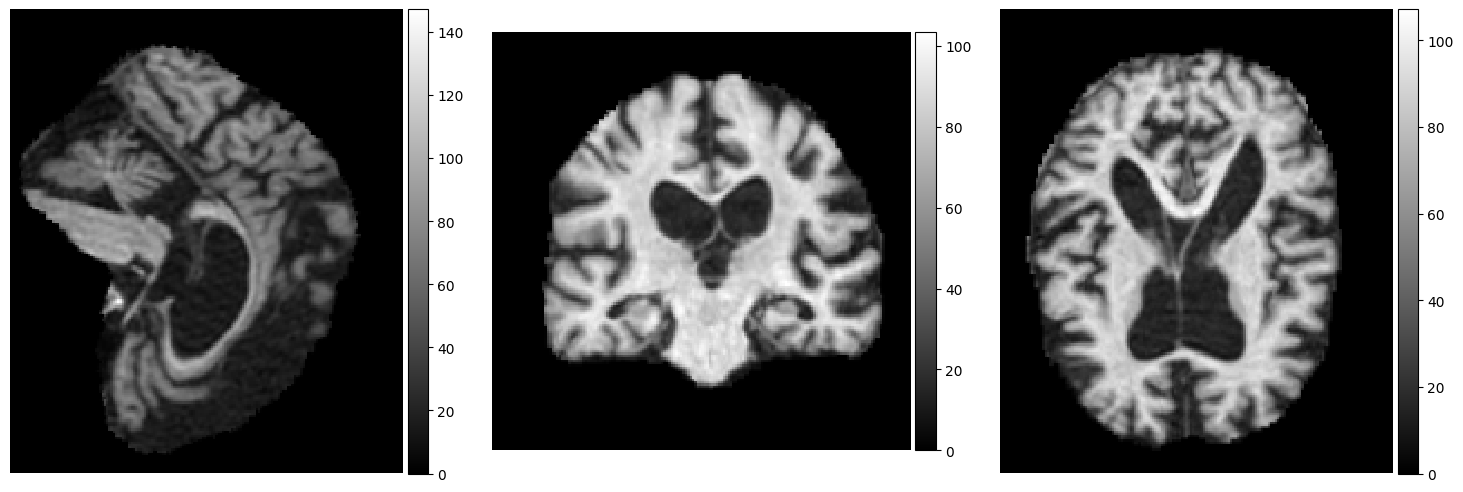

In [ ]:
mid_slices_imagenB = [np.take(imagenB, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_imagenB[1] = np.rot90(mid_slices_imagenB[1], 1)
mid_slices_imagenB[2] = np.rot90(mid_slices_imagenB[2], -1)

ne.plot.slices(mid_slices_imagenB, cmaps=['gray'], do_colorbars=True);

In [ ]:
!python /content/Fast-Symmetric-Diffeomorphic-Image-Registration-with-Convolutional-Neural-Networks/Code/Test_SYMNet_neurite_oasis.py --modelpath /content/Fast-Symmetric-Diffeomorphic-Image-Registration-with-Convolutional-Neural-Networks/Model/SYMNet_neurite_oasis_smo30_update_80000.pth --fixed /content/drive/MyDrive/pruebasTFG/002_S_0619_ADNI1_MPRAGE_N3-NoSkull.nii --moving /content/drive/MyDrive/pruebasTFG/002_S_0295_ADNI1_MPRAGE_N3-NoSkull.nii

Finished.


In [ ]:
ruta_archivo = '/Result/wrapped_norm_B_to_A_full_size.nii.gz'

imagen_nifti = nib.load(ruta_archivo)
datos_imagen = imagen_nifti.get_fdata()

print('Archivo descomprimido y cargado en la variable imagen_nifti.')

Archivo descomprimido y cargado en la variable imagen_nifti.


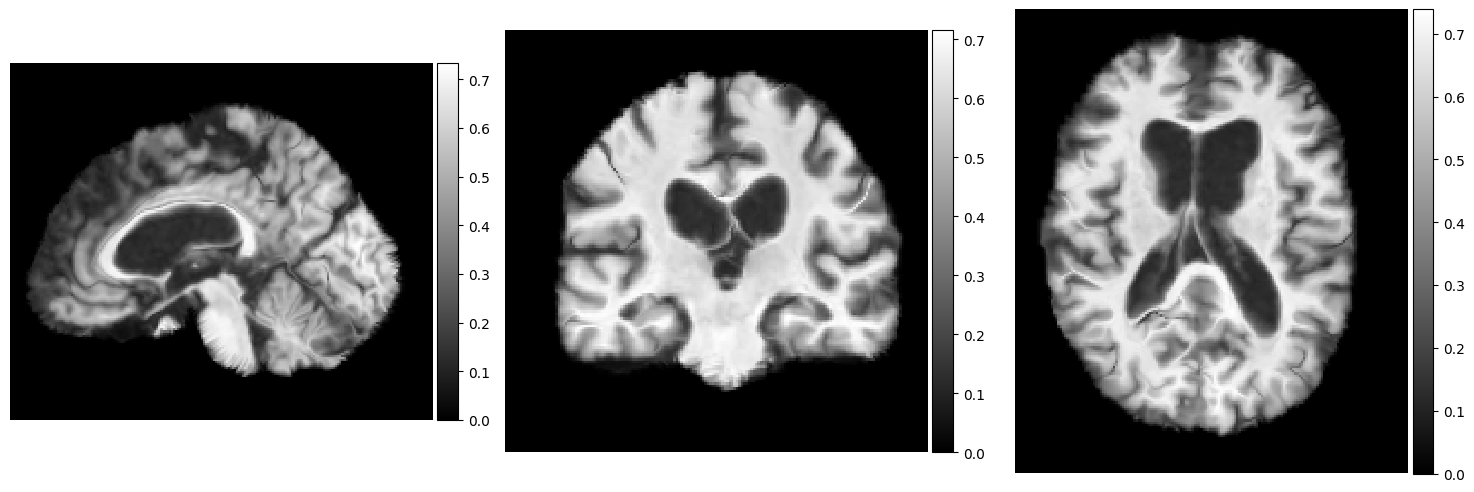

In [ ]:
vol_shape = (176, 208, 176)

mid_slices_datos_imagen = [np.take(datos_imagen, vol_shape[d]//2, axis=d) for d in range(3)]
mid_slices_datos_imagen[1] = np.rot90(mid_slices_datos_imagen[1], 1)
mid_slices_datos_imagen[2] = np.rot90(mid_slices_datos_imagen[2], -1)
mid_slices_datos_imagen[0] = np.transpose(mid_slices_datos_imagen[0], (1, 0))
mid_slices_datos_imagen[0] = np.rot90(mid_slices_datos_imagen[0], -1)
mid_slices_datos_imagen[0] = np.rot90(mid_slices_datos_imagen[0], -1)
mid_slices_datos_imagen[2] = np.flipud(mid_slices_datos_imagen[2])

ne.plot.slices(mid_slices_datos_imagen, cmaps=['gray'], do_colorbars=True);

In [ ]:
imagenA = nib.load('/content/drive/MyDrive/pruebasTFG/002_S_0295_ADNI1_MPRAGE_N3-NoSkull.nii').get_fdata()
imagenA = (imagenA - np.min(imagenA)) / (np.max(imagenA) - np.min(imagenA))

imagenB = nib.load('/content/drive/MyDrive/pruebasTFG/002_S_0619_ADNI1_MPRAGE_N3-NoSkull.nii').get_fdata()
imagenB = (imagenB - np.min(imagenB)) / (np.max(imagenB) - np.min(imagenB))

In [ ]:
imagenA = imagenA[..., np.newaxis]
imagenA = imagenA[np.newaxis, ...]
imagenA.shape
imagenB = imagenB[..., np.newaxis]
imagenB = imagenB[np.newaxis, ...]
imagenB.shape
datos_imagen = datos_imagen[..., np.newaxis]
datos_imagen = datos_imagen[np.newaxis, ...]
datos_imagen.shape

(1, 176, 208, 176, 1)

In [ ]:
imagenA.shape

(1, 176, 208, 176, 1)

In [ ]:
imagenB.shape

(1, 176, 208, 176, 1)

In [ ]:
datos_imagen.shape

(176, 208, 176)

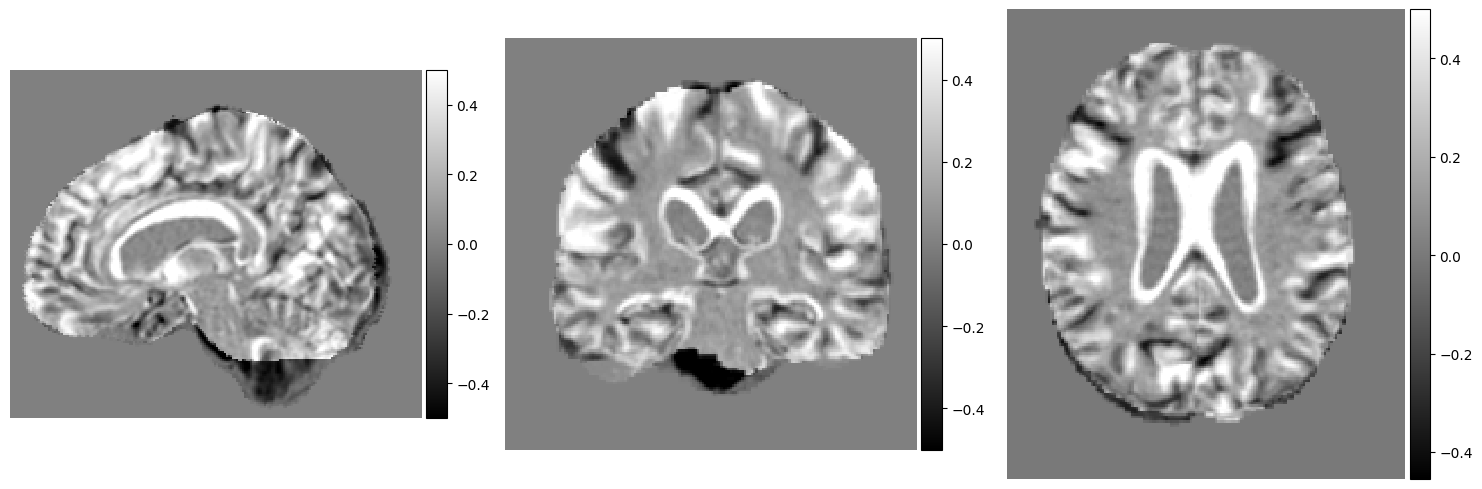

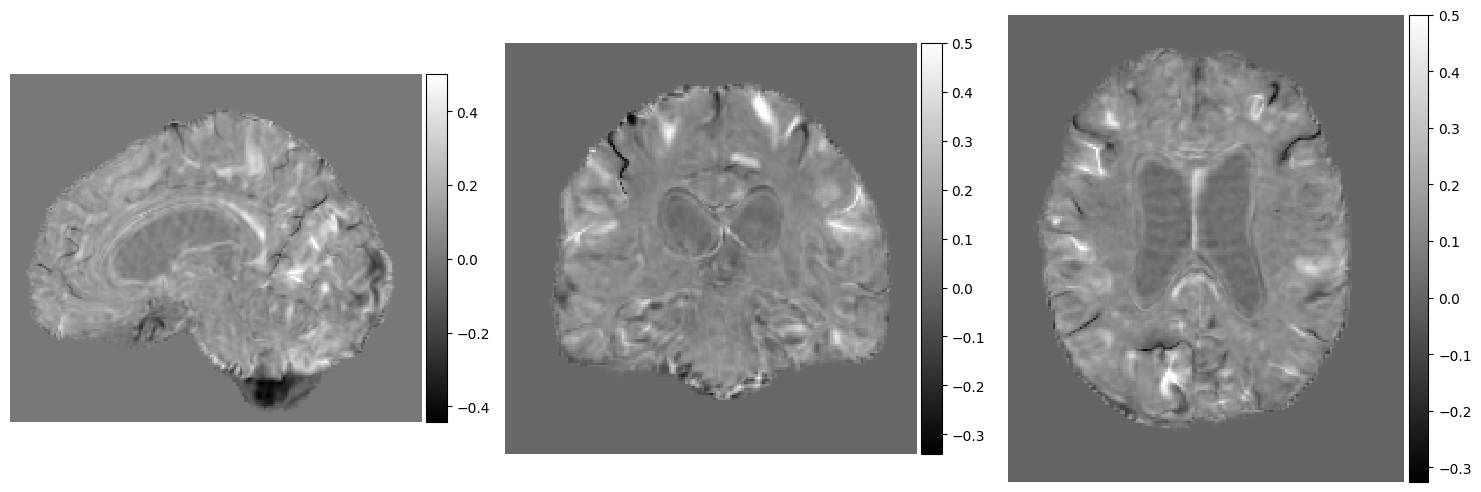

In [ ]:
moving = imagenA
fixed = imagenB
warped = datos_imagen

clim = 0.5

img = moving - fixed

img1 = img[0, 100, :, :,0]
img2 = img[0, :, 100, :,0]
img3 = img[0, :, :, 100,0]

img2 = np.rot90(img2, 1)
img3 = np.rot90(img3, -1)
img1 = np.transpose(img1, (1, 0))
img1 = np.rot90(img1, -1)
img1 = np.rot90(img1, -1)
img3 = np.flipud(img3)

images = [img1, img2, img3]

for i in range(len(images)):
    images[i] = np.clip(images[i], -clim, clim)

# visualize
ne.plot.slices(images, cmaps=['gray'], do_colorbars=True);


img = warped - fixed

img1 = img[0, 100, :, :,0]
img2 = img[0, :, 100, :,0]
img3 = img[0, :, :, 100,0]

img2 = np.rot90(img2, 1)
img3 = np.rot90(img3, -1)
img1 = np.transpose(img1, (1, 0))
img1 = np.rot90(img1, -1)
img1 = np.rot90(img1, -1)
img3 = np.flipud(img3)

images = [img1, img2, img3]

for i in range(len(images)):
    images[i] = np.clip(images[i], -clim, clim)

# visualize
ne.plot.slices(images, cmaps=['gray'], do_colorbars=True);

In [ ]:
import scipy.io as sio
sio.savemat('/content/drive/MyDrive/pruebasTFG/warp_SyMNet.mat', {'warp_SyMNet': datos_imagen})

In [ ]:
import scipy.io as sio
sio.savemat('/content/drive/MyDrive/pruebasTFG/warped_SyMNet.mat', {'warped_SyMNet': datos_imagen})